In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

# Import Data

In [382]:
df = pd.read_excel("../spring21_data/fa_stats_v2.xlsx")

# Feature Cleaning

In [383]:
numerical = ['age',
       'games_played', 'minutes_played', 
       'player_efficiency_rating', 'true_shooting_percentage',
       'three_point_attempt_rate', 'free_throw_attempt_rate',
       'offensive_rebound_percentage', 'defensive_rebound_percentage',
       'assist_percentage', 'steal_percentage',
       'block_percentage', 'turnover_percentage', 'usage_percentage',
       'offensive_win_shares', 'defensive_win_shares',
       'win_shares_per_48_minutes', 'offensive_box_plus_minus',
       'defensive_box_plus_minus',
       'value_over_replacement_player','O-LEBRON', 'D-LEBRON', 'Wins Added', 'ORPM', 'DRPM', 'poss',
       'raptor_offense', 'raptor_defense', 'war_total', 'war_reg_season',
       'war_playoffs', 'predator_offense', 'predator_defense', 'pace_impact',
       'LA_RAPM__Def', 'LA_RAPM__Off', 'RA_EFG__Def', 'RA_EFG__Off',
       'RA_FTR__Def', 'RA_FTR__Off', 'RA_ORBD__Def', 'RA_ORBD__Off',
       'RA_TOV__Def', 'RA_TOV__Off', 'RAPM__Def', 'RAPM__Off']

categorical = ["Type"]
other = [col for col in df.columns.values if (col not in categorical+numerical+["cap_space_usage"])]
dum_df = pd.get_dummies(df, columns=categorical) # convert the categorical features into dummy features (numerical)

In [384]:
df = dum_df.drop(columns=other) # drop the non-feature columns
df.dropna(inplace=True) # drop all rows with a null value (there should be none)

<AxesSubplot:xlabel='games_played'>

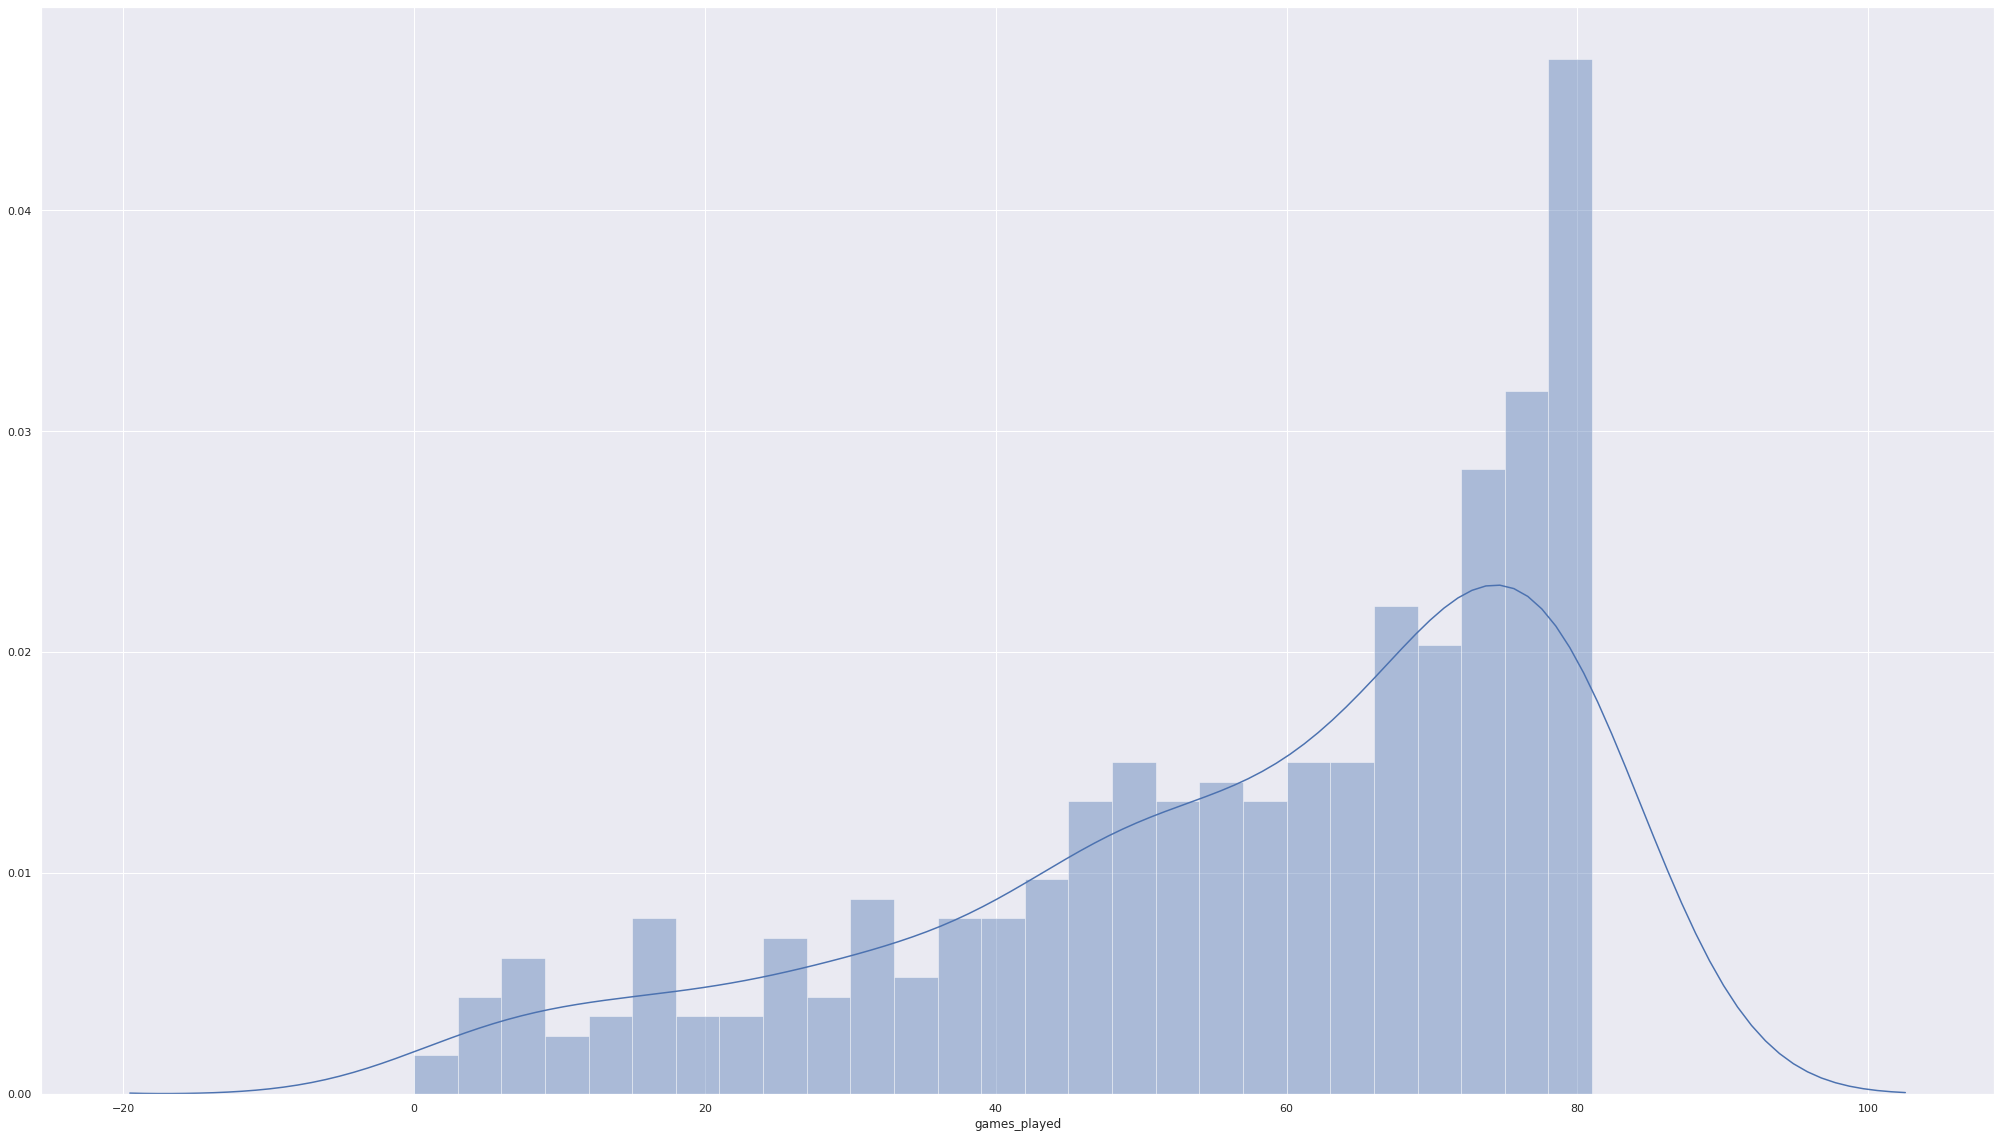

In [385]:
sns.distplot(df['games_played'], bins=np.arange(0, 82, 3))

In [386]:
df = df[df['games_played'] >= 20]

Split the dataset into training set, validation set, and test set (this is for the final run)

In [387]:
from sklearn.model_selection import train_test_split

In [388]:
X = df.drop(columns=["cap_space_usage"])
y = df["cap_space_usage"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.13, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.13, random_state=42)

In [389]:
# scale the numerical features only (this leaves out the dummy features from earlier)
from sklearn.preprocessing import StandardScaler
features = numerical
scaler = StandardScaler()

X_train[features] = scaler.fit_transform(X_train[features])
X_test[features] = scaler.transform(X_test[features])
X_val[features] = scaler.transform(X_val[features])

<ipython-input-389-130c03cd7c68>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[features] = scaler.transform(X_test[features])
/home/zach/miniconda3/envs/DataScience/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


# Feature Selection

In [390]:
from sklearn.feature_selection import SelectKBest, f_regression
select = SelectKBest(f_regression, k=20)

best_features = select.fit_transform(X_train, y_train)
feature_scores = pd.concat([pd.Series(X_train.columns), pd.Series(select.scores_)], axis=1)
feature_scores.columns = ["features", "score"]

In [391]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [392]:
feature_scores.sort_values(by=["score"], ascending=False)

,features,score
2,Wins Added,332.892813
45,value_over_replacement_player,317.645870
8,war_total,283.143354
9,war_reg_season,264.757742
5,poss,256.681538
40,offensive_win_shares,234.186541
28,minutes_played,219.710086
43,offensive_box_plus_minus,199.100470
11,predator_offense,186.296946
41,defensive_win_shares,168.115642


Since this is the baseline model I decided just to use these features and call it a day for now.

In [393]:
features = list(feature_scores.sort_values(by=["score"], ascending=False).head(10)['features'])

In [394]:
X_train = X_train[features]
X_test = X_test[features]
X_val = X_val[features]

### helper functions

run(model, model_name, x_train, x_val) fits the model on the training set, evaluates the fit on the training set and on the validation set. 

evaluate(y_pred, y_test) prints out the evaluation metrics of a prediction.

In [395]:
def run(model, model_name, x_train, x_val):
    """ Fits the model and prints out results from calling evaluate on the training and validation set
        parameters:
            model
                the unfitted model, from sklearn (has to have a fit and predict method)
            model_name
                String, the name of the model
            x_train
                DataFrame, the training set
            x_val
                DataFrame, the validation set
                
        returns:
            nothing
        
    """
    model = model.fit(x_train, y_train)
    y_pred = np.clip(model.predict(x_train), 0, 1000) # since negative results are meaningless
    
    print("[{0}] These are the results for the training set.".format(model_name))
    
    evaluate(y_pred, y_train)
    print("--------------------------------------")
    
    print("[{0}] These are the results for the validation set.".format(model_name))
    y_pred = np.clip(model.predict(x_val), 0, 1000) # since negative results are meaningless
    
    evaluate(y_pred, y_val)
    
    print("_____________________________________________")

In [396]:
def evaluate(y_pred, y_test):
    """ Prints out the evaluation metrics of the experiment
        parameters:
            y_pred
                DataFrame or array-like, the predictions
            y_test
                DataFrame or array-like, the actual y-values
                
            these two parameters must have the same dimensions
    """
    print("r^2: ", r2_score(y_test, y_pred))
    print("mse: ", mean_squared_error(y_test, y_pred))
    print("variance_score: ", explained_variance_score(y_test, y_pred))
    print("mse-log: ", mean_squared_log_error(y_test, y_pred))

Here I'm trying those five linear models without any tuning and testing the performance.

In [397]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV, LassoLarsCV
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_squared_log_error

lstsq = LinearRegression()
ridge = RidgeCV()
lasso = LassoCV(max_iter=5000, random_state = 0)
elasticNet = ElasticNetCV(n_alphas = 1000)
lassoLars = LassoLarsCV()

run(ridge, "Ridge", X_train, X_val)
run(lstsq, "Least Squares", X_train,  X_val)
run(lasso, "Lasso", X_train,  X_val)
run(elasticNet, "ElasticNetCV", X_train,  X_val)
run(lassoLars, "Lasso LARS", X_train,  X_val)

[Ridge] These are the results for the training set.
r^2:  0.6548957049771678
mse:  0.0022282169574550734
variance_score:  0.654924772692497
mse-log:  0.0017727762971155028
--------------------------------------
[Ridge] These are the results for the validation set.
r^2:  0.7142710215070909
mse:  0.002214513623162915
variance_score:  0.7161372926588347
mse-log:  0.001801561640213248
_____________________________________________
[Least Squares] These are the results for the training set.
r^2:  0.6576384119101165
mse:  0.0022105082642122904
variance_score:  0.6576734111034344
mse-log:  0.0017528404235696358
--------------------------------------
[Least Squares] These are the results for the validation set.
r^2:  0.7081982250449861
mse:  0.002261580219512225
variance_score:  0.7089935426259046
mse-log:  0.0018286201666114566
_____________________________________________
[Lasso] These are the results for the training set.
r^2:  0.6516149414749737
mse:  0.002249399692571438
variance_score:  0

Here I'm transforming the datasets to include quadratic features (eecs16b). This means that for feature: points, the PolynomialFeatures transformer will add a column of points-squared to the dataset.

In [398]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X_trainPF = poly.fit_transform(X_train)
X_valPF = poly.transform(X_val)
X_valPF = poly.transform(X_val)

lstsq = LinearRegression()
ridge = RidgeCV()
lasso = LassoCV(max_iter=50000, random_state = 0)
elasticNet = ElasticNetCV(max_iter=50000, n_alphas = 1000)
lassoLars = LassoLarsCV()

run(ridge, "Ridge", X_trainPF, X_valPF)
run(lstsq, "Least Squares", X_trainPF, X_valPF)
run(lasso, "Lasso", X_trainPF, X_valPF)
run(elasticNet, "ElasticNetCV", X_trainPF, X_valPF)
run(lassoLars, "Lasso LARS", X_trainPF, X_valPF)

[Ridge] These are the results for the training set.
r^2:  0.7346977470699856
mse:  0.0017129632617020377
variance_score:  0.7346977528274389
mse-log:  0.0013740222058727244
--------------------------------------
[Ridge] These are the results for the validation set.
r^2:  0.6343857396520112
mse:  0.0028336564412676365
variance_score:  0.6362220589175437
mse-log:  0.002312058426767145
_____________________________________________
[Least Squares] These are the results for the training set.
r^2:  0.7804907373448114
mse:  0.0014172940424702356
variance_score:  0.7804958325526083
mse-log:  0.001159893826395874
--------------------------------------
[Least Squares] These are the results for the validation set.
r^2:  0.5186914101375719
mse:  0.0037303336708010186
variance_score:  0.5288142571063991
mse-log:  0.002982272699839555
_____________________________________________
[Lasso] These are the results for the training set.
r^2:  0.6976074606576046
mse:  0.0019524421854154185
variance_score: 

Since these results are much better (except least squares), we're probably going to need to look beyond just linear-models.

**To put the result of baseline model into contexts, we also need to look into data entries manually to do some sanity checks**

In [399]:
train_indexes = X_train.index

In [400]:
sanity_check_train_df = dum_df.iloc[train_indexes][['key', 'cap_space_usage', 'Wins Added', 'value_over_replacement_player',
                                                      'war_total', 'win_shares','salary']]
sanity_check_train_df['val_cap_usage'] = elasticNet.predict(X_trainPF)
sanity_check_train_df['diff'] = sanity_check_train_df['val_cap_usage'] - sanity_check_train_df['cap_space_usage']

In [401]:
training_set = sanity_check_train_df.sort_values('diff', ascending=False)

In [402]:
validation_indexes = X_val.index

In [403]:
sanity_check_val_df = dum_df.iloc[validation_indexes][['key', 'cap_space_usage', 'Wins Added', 'value_over_replacement_player',
                                                      'war_total', 'win_shares']]
sanity_check_val_df['val_cap_usage'] = elasticNet.predict(X_valPF)
sanity_check_val_df['diff'] = sanity_check_val_df['val_cap_usage'] - sanity_check_val_df['cap_space_usage']

In [404]:
validation_set = sanity_check_val_df.sort_values('diff', ascending=False)
validation_set['category'] = validation_set['diff'].apply(lambda x: 'Increase' if x >= 0.015 else 'Decrease' if x <= -0.015 else 'Match')
validation_set['abs_diff'] = abs(validation_set['diff'])

In [405]:
training_set[['key', 'cap_space_usage', 'val_cap_usage', 'diff']].head(25)

,key,cap_space_usage,val_cap_usage,diff
293,Willie Cauley-Stein2019,0.019951,0.141732,0.121781
163,Derrick Rose2017,0.013691,0.110592,0.096901
294,Brook Lopez2019,0.110803,0.197544,0.086741
301,Al-Farouq Aminu2019,0.084827,0.171066,0.086239
230,DeMarcus Cousins2018,0.052391,0.138173,0.085783
12,Zaza Pachulia2016,0.030783,0.110990,0.080207
236,Jeff Green2018,0.023500,0.101944,0.078444
299,Danny Green2019,0.134086,0.203071,0.068985
300,JaVale McGee2019,0.036650,0.104724,0.068074
20,Jared Sullinger2016,0.059781,0.127665,0.067884


In [406]:
validation_set[['key', 'cap_space_usage', 'val_cap_usage', 'diff']].head(25)

,key,cap_space_usage,val_cap_usage,diff
50,Raymond Felton2016,0.016482,0.095273,0.078791
70,Dion Waiters2016,0.030783,0.106745,0.075962
222,Will Barton2018,0.117798,0.192421,0.074622
246,Yogi Ferrell2018,0.029450,0.099550,0.070101
220,Julius Randle2018,0.084825,0.138738,0.053913
171,Rajon Rondo2017,0.033302,0.085727,0.052425
227,Anthony Tolliver2018,0.056445,0.105844,0.049399
321,Dorian Finney-Smith2019,0.036650,0.081912,0.045262
164,Shabazz Muhammad2017,0.012500,0.055788,0.043289
139,Zaza Pachulia2017,0.035094,0.071845,0.036750


**The following is for visualization**

In [407]:
from adjustText import adjust_text

In [408]:
sns.set(rc={'figure.figsize':(20, 20)})

In [ ]:
sns.scatterplot(data=training_set, x="value_over_replacement_player", y="val_cap_usage", hue='win_shares',
                size='diff', sizes=(10, 100))
plt.text(training_set['Wins Added'][training_set.key=='Derrick Rose2017'],
         training_set['val_cap_usage'][training_set.key=='Derrick Rose2017'],
         'Derrick Rose2017', 
 fontdict=dict(color='black', alpha=0.5, size=8))

In [409]:
sns.set(rc={'figure.figsize':(35, 20)}, style='darkgrid')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

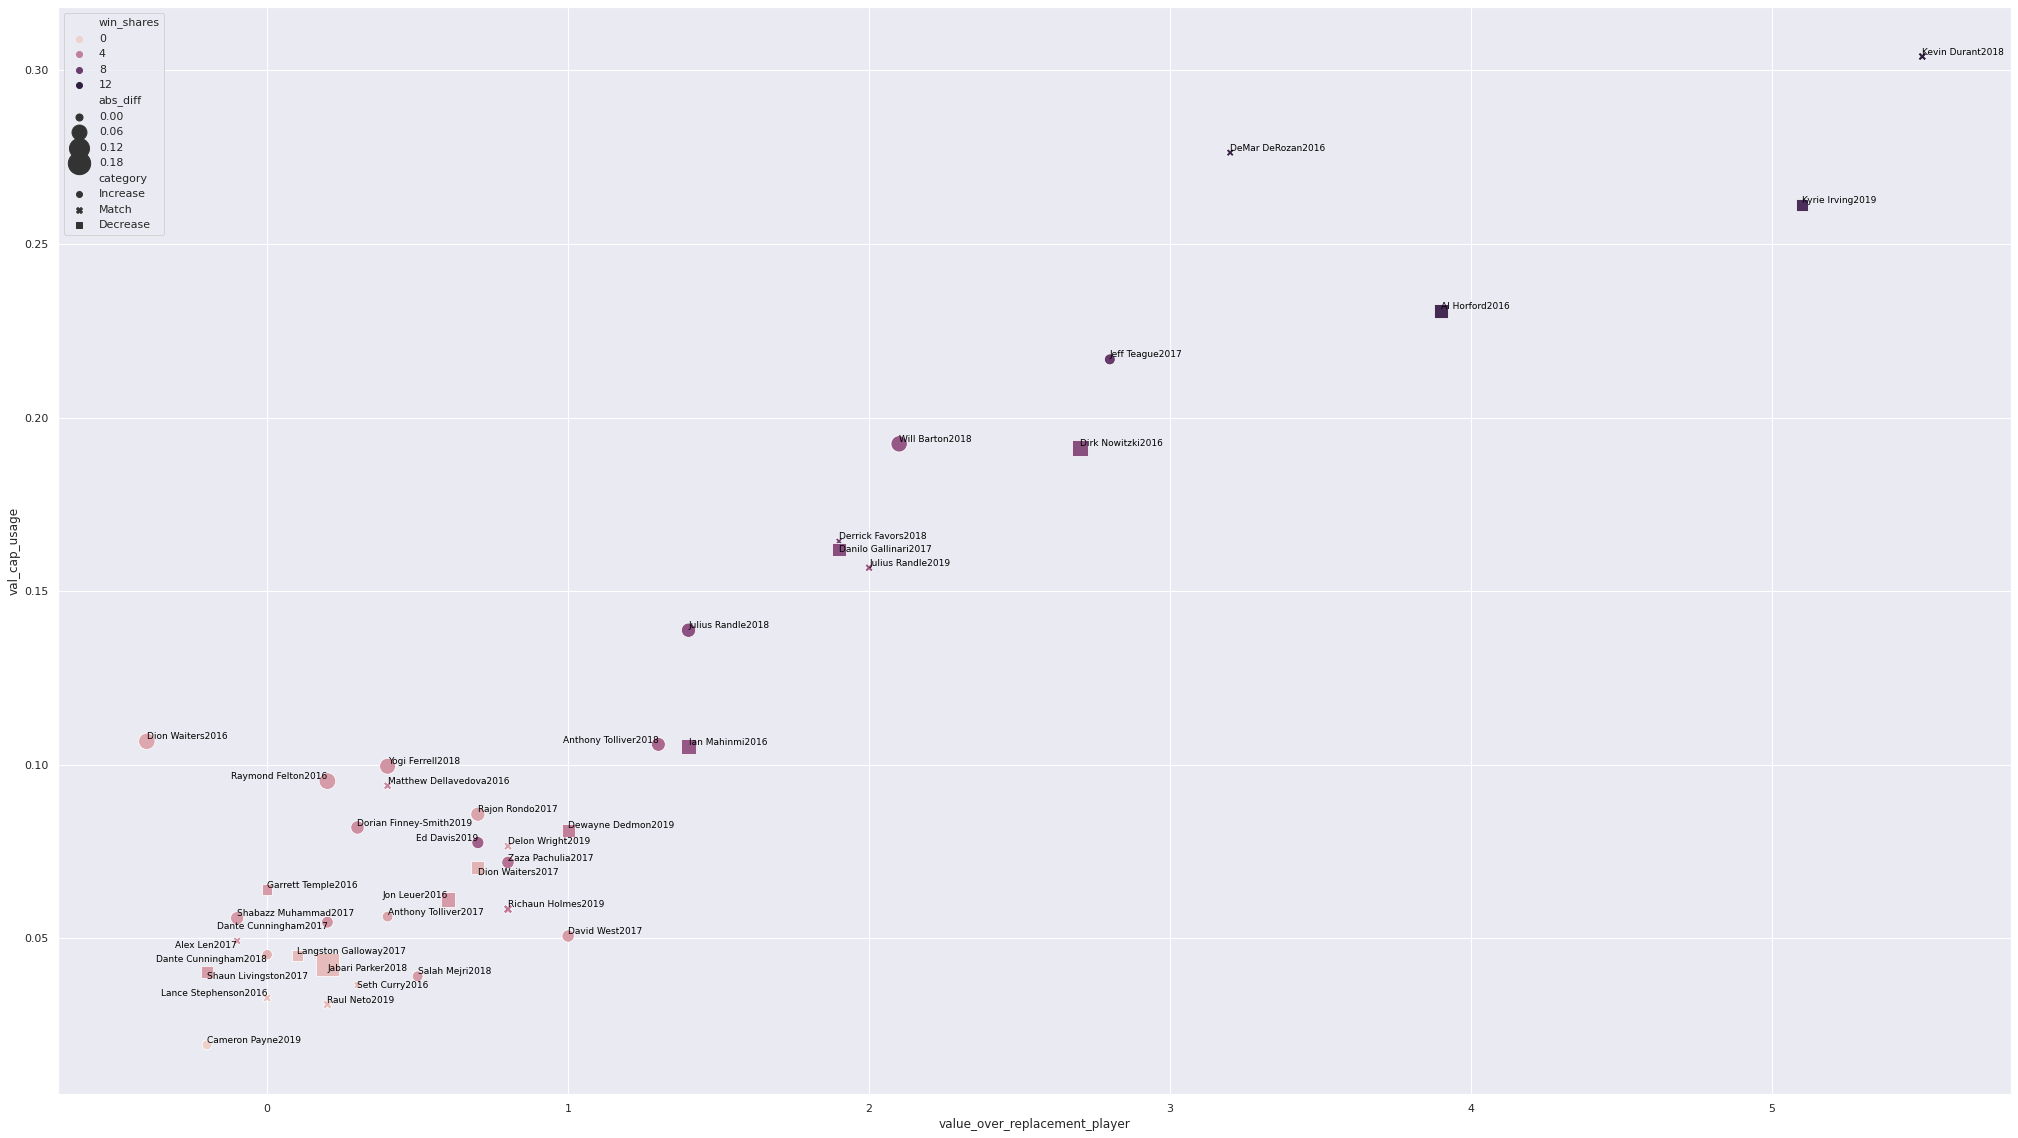

In [410]:
sns.scatterplot(data=validation_set, x="value_over_replacement_player", y="val_cap_usage", hue='win_shares',
                size='abs_diff', sizes=(50, 500), style='category')
texts = []
for key in validation_set.key:
    texts.append(plt.text(validation_set['value_over_replacement_player'][validation_set.key==key],
         validation_set['val_cap_usage'][validation_set.key==key],
         key, 
            fontdict=dict(color='black', alpha=1, size=9, ma='center')))
adjust_text(texts, only_move={'texts':'y'})
plt.show()
